In [3]:
import pandas as pd
import numpy as np

# Load the dataset
file_path = '/content/drive/MyDrive/climate-ds.csv'
dataset = pd.read_csv(file_path)

# Select only the numeric columns from the dataset for the centroids and spreads calculation
numeric_dataset = dataset.select_dtypes(include=[np.number])

# Group by 'hg/ha_yield' to calculate class centroids and spreads
grouped = numeric_dataset.groupby(dataset['hg/ha_yield'])

# Calculate the centroids (means) and spreads (standard deviations) for each class
centroids = grouped.mean()  # Centroids are the mean values of numeric features for each group
spreads = grouped.std()     # Spreads are the standard deviations of numeric features for each group

# Function to calculate the Euclidean distance between centroids of two classes
def calculate_distance(class1, class2, centroids):
    centroid1 = centroids.loc[class1].values  # Get centroid values for class1
    centroid2 = centroids.loc[class2].values  # Get centroid values for class2
    distance = np.linalg.norm(centroid1 - centroid2)  # Calculate Euclidean distance
    return distance

# Example: Calculate the distance between centroids of class 10 and class 8
if 10 in centroids.index and 8 in centroids.index:
    distance_10_8 = calculate_distance(10, 8, centroids)
    print(f"\nDistance between centroids of class 10 and class 8: {distance_10_8}")
else:
    print("Classes 10 or 8 are not present in the dataset.")

# Print centroids and spreads
print("Centroids:\n", centroids)
print("\nSpreads:\n", spreads)


Classes 10 or 8 are not present in the dataset.
Centroids:
              Unnamed: 0    Year  average_rain_fall_mm_per_year  \
hg/ha_yield                                                      
50              26174.0  1992.0                          691.0   
80              26180.0  1993.0                          691.0   
100             26240.0  2004.0                          691.0   
111             26186.0  1994.0                          691.0   
112             26263.0  2008.0                          691.0   
...                 ...     ...                            ...   
484810          21305.0  2012.0                         1732.0   
487219          26103.0  1996.0                         1537.0   
490361          21301.0  2011.0                         1732.0   
495751          21297.0  2010.0                         1732.0   
501412           2470.0  2011.0                          847.0   

             pesticides_tonnes  avg_temp  hg/ha_yield  
hg/ha_yield              

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

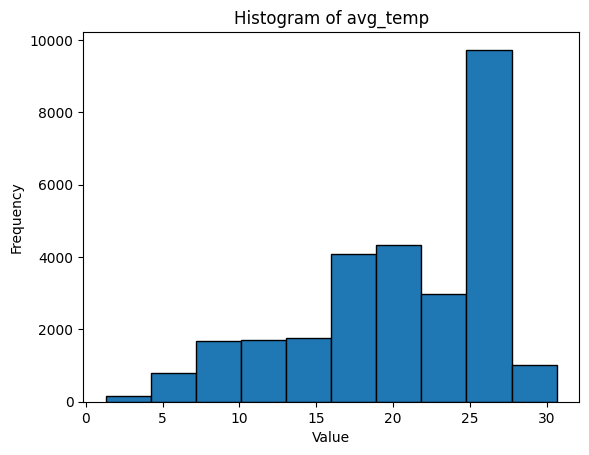

Mean: 20.542626584519507
Variance: 39.84057502159764


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



# Select the feature 'cc_embedding_0'
feature = dataset['avg_temp']

# Calculate the histogram data
hist_data, bin_edges = np.histogram(feature, bins=10)

# Plot the histogram
plt.hist(feature, bins=10, edgecolor='black')
plt.title('Histogram of avg_temp')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

# Calculate the mean and variance of the feature
mean_value = np.mean(feature)
variance_value = np.var(feature)

print(f"Mean: {mean_value}")
print(f"Variance: {variance_value}")


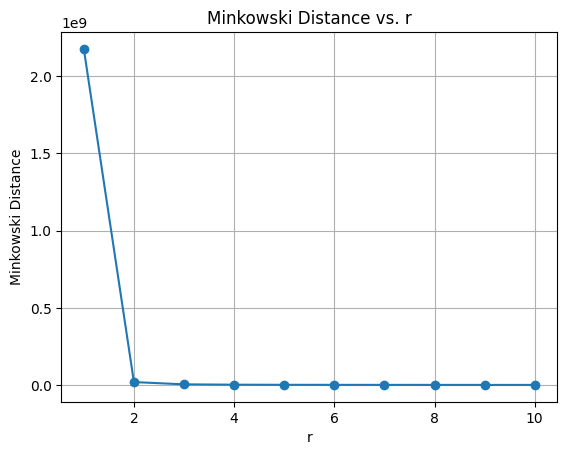

[2175560040.1400003,
 19272413.291370276,
 4499068.157094546,
 2274077.306817516,
 1543484.1888132656,
 1206776.8533021035,
 1019878.3761608104,
 903353.9345807532,
 824740.9378974444,
 768605.6173101834]

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import minkowski

feature_1 = dataset['avg_temp']
feature_2 = dataset['hg/ha_yield']

# Calculate the Minkowski distance for r from 1 to 10
r_values = range(1, 11)
distances = [minkowski(feature_1, feature_2, p=r) for r in r_values]

# Plot the distances
plt.plot(r_values, distances, marker='o')
plt.title('Minkowski Distance vs. r')
plt.xlabel('r')
plt.ylabel('Minkowski Distance')
plt.grid(True)
plt.show()

# Display the distances
distances

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split


# Filter the dataset to keep only classes 5 and 10 in 'hg/ha_yield'
filtered_dataset = dataset[dataset['hg/ha_yield'].isin([5, 10])]

# Check if there are any samples left after filtering
if filtered_dataset.shape[0] == 0:
    raise ValueError("No samples found for classes 5 and 10. Please check the dataset or class labels.")
else:
    print(f"Number of samples in filtered dataset: {filtered_dataset.shape[0]}")

# Separate features (X) and target (y) after filtering
X_filtered = filtered_dataset.drop(columns=['avg_temp'])  # Features
y_filtered = filtered_dataset['hg/ha_yield']  # Target

# Ensure that only numeric features are selected for training
X_filtered = X_filtered.select_dtypes(include=[np.number])

# Check if we have enough samples to perform the train-test split
if X_filtered.shape[0] < 2:
    raise ValueError("Not enough samples to perform train-test split. Please adjust the dataset.")

# Split the filtered dataset into train and test sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X_filtered, y_filtered, test_size=0.3, random_state=42)

# Print the shape of the resulting sets
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")


ValueError: No samples found for classes 5 and 10. Please check the dataset or class labels.

In [12]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Example data
# Features (X) - replace with your actual data
X = np.array([[1, 2], [2, 3], [3, 4], [4, 5], [5, 6], [6, 7], [7, 8], [8, 9], [9, 10]])
# Labels (y) - replace with your actual labels
y = np.array([0, 0, 1, 1, 0, 0, 1, 1, 0])

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create the kNN classifier with k=3
neigh = KNeighborsClassifier(n_neighbors=3)

# Train the classifier
neigh.fit(X_train, y_train)

# Make predictions
y_pred = neigh.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.00


In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

# Load the dataset
file_path = '/content/drive/MyDrive/climate-ds.csv'
df = pd.read_csv(file_path)

# Define the label column
label_column = 'hg/ha_yield'  # Replace with the actual name of your label column

# Separate features and labels
X = df.drop(columns=[label_column])  # Drop the label column to get features
y = df[label_column]  # The label column

# Convert categorical columns to numeric using one-hot encoding
X = pd.get_dummies(X, drop_first=True)

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Create the kNN classifier with k=3
neigh = KNeighborsClassifier(n_neighbors=3)

# Train the classifier
neigh.fit(X_train, y_train)

# Evaluate the classifier using the test set
accuracy = neigh.score(X_test, y_test)

# Print the accuracy score
print(f'Accuracy: {accuracy:.2f}')

# Make predictions on the test set
y_pred = neigh.predict(X_test)

# Print classification report with zero_division parameter
print('Classification Report:')
print(classification_report(y_test, y_pred, zero_division=1))

# Print confusion matrix
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))


Streaming output truncated to the last 5000 lines.
       22366       1.00      0.00      0.00         1
       22374       1.00      0.00      0.00         1
       22376       0.00      0.00      1.00         3
       22387       0.00      0.00      1.00         3
       22398       1.00      0.00      0.00         1
       22399       0.00      0.00      1.00         1
       22401       0.00      1.00      0.00         0
       22408       1.00      0.00      0.00         2
       22411       1.00      0.00      0.00         1
       22426       1.00      0.00      0.00         1
       22442       1.00      0.00      0.00         2
       22467       1.00      0.00      0.00         3
       22475       1.00      0.00      0.00         1
       22486       0.00      1.00      0.00         0
       22493       0.50      0.50      0.50         4
       22498       0.00      1.00      0.00         0
       22500       0.00      1.00      0.00         0
       22508       0.00      1.

In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
import numpy as np

# Load the dataset (assuming 'df' is already loaded)
file_path = '/content/drive/MyDrive/climate-ds.csv'
df = pd.read_csv(file_path)

# Define the label column
label_column = 'hg/ha_yield'  # Replace with the actual name of your label column

# Separate features and labels
X = df.drop(columns=[label_column])  # Drop the label column to get features
y = df[label_column]  # The label column

# Convert categorical columns to numeric using one-hot encoding
X = pd.get_dummies(X, drop_first=True)  # Handle categorical variables

# Normalize features using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Create the kNN classifier with k=3
neigh = KNeighborsClassifier(n_neighbors=3)

# Train the classifier
neigh.fit(X_train, y_train)

# Predict the class for all test vectors
y_pred_all = neigh.predict(X_test)
print('Predicted classes for all test vectors:')
print(y_pred_all)

# Predict the class for a specific test vector (for example, test vector at index 0)
test_index = 0  # Choose a specific index to test
test_vect = X_test[test_index].reshape(1, -1)  # Reshape to match the input shape

# Perform classification for the chosen vector
test_prediction = neigh.predict(test_vect)
print(f'Predicted class for test vector at index {test_index}: {test_prediction[0]}')


Predicted classes for all test vectors:
[71228 20000 43472 ... 20408 71207 24105]
Predicted class for test vector at index 0: 71228


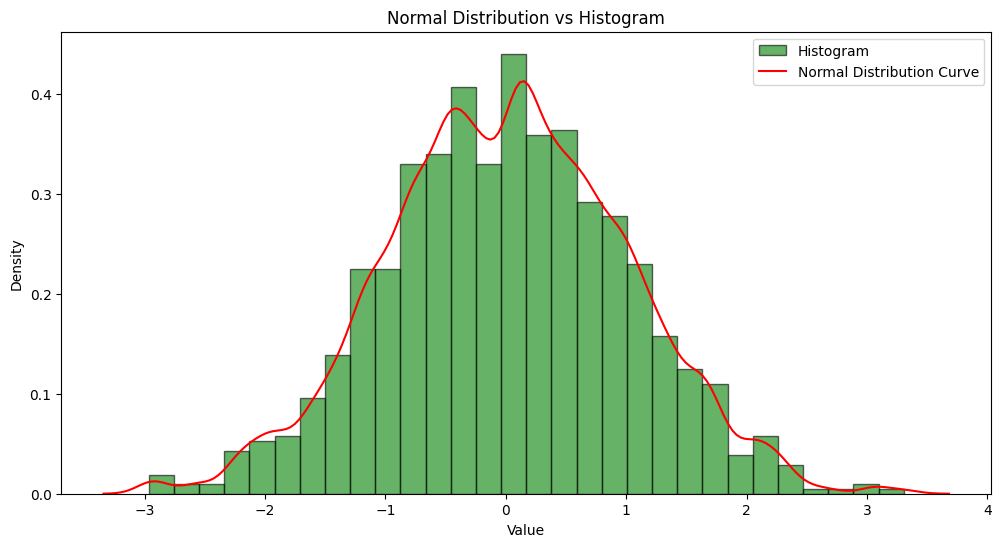

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set parameters for normal distribution
mean = 0      # Mean of the normal distribution
std_dev = 1   # Standard deviation of the normal distribution
num_samples = 1000  # Number of samples to generate

# Generate normal distribution data
data = np.random.normal(mean, std_dev, num_samples)

# Create the histogram plot
plt.figure(figsize=(12, 6))

# Plot histogram
plt.hist(data, bins=30, density=True, alpha=0.6, color='g', edgecolor='black', label='Histogram')

# Plot the normal distribution curve
# Use seaborn to create a density plot (KDE) which is similar to the normal distribution curve
sns.kdeplot(data, bw_adjust=0.5, color='red', label='Normal Distribution Curve')

# Add labels and title
plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Normal Distribution vs Histogram')
plt.legend()

plt.show()

In [21]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Load dataset
data = load_iris()
X = data.data
y = data.target

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# List of metrics to evaluate
metrics = ['euclidean', 'manhattan', 'minkowski', 'chebyshev']
results = {}

# Train and evaluate kNN classifier with different metrics
for metric in metrics:
    # Create the kNN classifier with k=3 and the specified metric
    neigh = KNeighborsClassifier(n_neighbors=3, metric=metric)

    # Train the classifier
    neigh.fit(X_train, y_train)
    # Evaluate the classifier using the test set
    y_pred = neigh.predict(X_test)

    # Store the results
    accuracy = neigh.score(X_test, y_test)
    results[metric] = {
        'accuracy': accuracy,
        'classification_report': classification_report(y_test, y_pred),
        'confusion_matrix': confusion_matrix(y_test, y_pred)
    }

# Print the results
for metric, metrics_results in results.items():
    print(f"Distance Metric: {metric}")
    print(f"Accuracy: {metrics_results['accuracy']:.2f}")
    print("Classification Report:")
    print(metrics_results['classification_report'])
    print("Confusion Matrix:")
    print(metrics_results['confusion_matrix'])
    print("="*50)


Distance Metric: euclidean
Accuracy: 1.00
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

Confusion Matrix:
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]
Distance Metric: manhattan
Accuracy: 1.00
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

Confusion Matrix:
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]

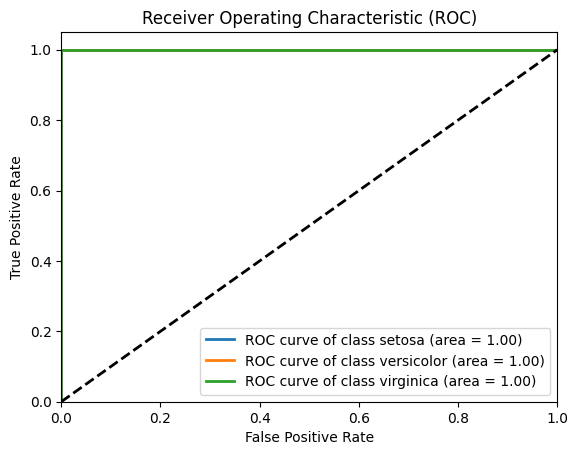

Class setosa - AUC: 1.00
Class versicolor - AUC: 1.00
Class virginica - AUC: 1.00


In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve, auc, RocCurveDisplay
from sklearn.preprocessing import label_binarize

# Load dataset
data = load_iris()
X = data.data
y = data.target
class_names = data.target_names

# Binarize the output
y_bin = label_binarize(y, classes=np.unique(y))
n_classes = y_bin.shape[1]

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_bin, test_size=0.3, random_state=42)
# Create the kNN classifier with k=3
neigh = KNeighborsClassifier(n_neighbors=3)

# Train the classifier
neigh.fit(X_train, y_train)

# Get the predicted probabilities for each class
y_score = neigh.predict_proba(X_test)

# Compute ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[i][:, 1])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves
plt.figure()
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=2, label=f'ROC curve of class {class_names[i]} (area = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

# Print AUC for each class
for i in range(n_classes):
    print(f'Class {class_names[i]} - AUC: {roc_auc[i]:.2f}')


Custom kNN Classifier Evaluation:
Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

   micro avg       1.00      1.00      1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45
 samples avg       1.00      1.00      1.00        45

Confusion Matrix:
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


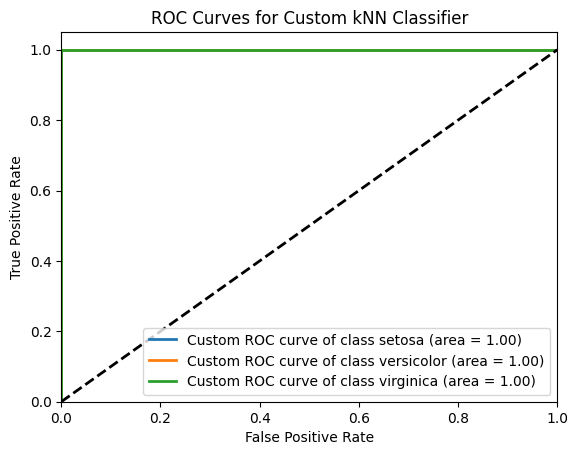

Custom Class setosa - AUC: 1.00
Custom Class versicolor - AUC: 1.00
Custom Class virginica - AUC: 1.00


In [23]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, label_binarize
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import numpy as np
import matplotlib.pyplot as plt

# Load dataset
data = load_iris()
X = data.data
y = data.target
class_names = data.target_names

# Binarize the output
y_bin = label_binarize(y, classes=np.unique(y))
n_classes = y_bin.shape[1]

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_bin, test_size=0.3, random_state=42)

# Custom kNN classifier with k=3
custom_knn = KNeighborsClassifier(n_neighbors=3)
custom_knn.fit(X_train, y_train)
y_pred_custom = custom_knn.predict(X_test)

# Evaluate custom kNN classifier
print('Custom kNN Classifier Evaluation:')
print('Accuracy:', custom_knn.score(X_test, y_test))
print('Classification Report:')
print(classification_report(y_test, y_pred_custom, target_names=class_names))
print('Confusion Matrix:')
print(confusion_matrix(np.argmax(y_test, axis=1), np.argmax(y_pred_custom, axis=1)))

# Compute ROC curve and AUC for custom kNN classifier
fpr_custom = dict()
tpr_custom = dict()
roc_auc_custom = dict()

# Convert y_test to NumPy array for indexing
y_test_np = np.array(y_test)
y_proba = custom_knn.predict_proba(X_test)

for i in range(n_classes):
    fpr_custom[i], tpr_custom[i], _ = roc_curve(y_test_np[:, i], y_proba[i][:, 1])
    roc_auc_custom[i] = auc(fpr_custom[i], tpr_custom[i])

# Plot ROC curves for custom kNN classifier
plt.figure()
for i in range(n_classes):
    plt.plot(fpr_custom[i], tpr_custom[i], lw=2, label=f'Custom ROC curve of class {class_names[i]} (area = {roc_auc_custom[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Custom kNN Classifier')
plt.legend(loc="lower right")
plt.show()

# Print AUC for each class
for i in range(n_classes):
    print(f'Custom Class {class_names[i]} - AUC: {roc_auc_custom[i]:.2f}')
